# Day and Night Image Classifier
---

The day/night image dataset consists of 200 RGB color images in two categories: day and night. There are equal numbers of each example: 100 day images and 100 night images.

We'd like to build a classifier that can accurately label these images as day or night, and that relies on finding distinguishing features between the two types of images!

*Note: All images come from the [AMOS dataset](http://cs.uky.edu/~jacobs/datasets/amos/) (Archive of Many Outdoor Scenes).*


### Import resources

Before you get started on the project code, import the libraries and resources that you'll need.

In [1]:
import cv2 # computer vision library
import helpers

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

## Training and Testing Data
The 200 day/night images are separated into training and testing datasets. 

* 60% of these images are training images, for you to use as you create a classifier.
* 40% are test images, which will be used to test the accuracy of your classifier.

First, we set some variables to keep track of some where our images are stored:

    image_dir_training: the directory where our training image data is stored
    image_dir_test: the directory where our test image data is stored

In [2]:
# Image data directories
image_dir_training = "day_night_images/training/"
image_dir_test = "day_night_images/test/"

## Load the datasets

These first few lines of code will load the training day/night images and store all of them in a variable, `IMAGE_LIST`. This list contains the images and their associated label ("day" or "night"). 

For example, the first image-label pair in `IMAGE_LIST` can be accessed by index: 
``` IMAGE_LIST[0][:]```.


In [3]:
# Using the load_dataset function in helpers.py
# Load training data
IMAGE_LIST = helpers.load_dataset(image_dir_training)


---
# 1. Visualize the input images


(555, 800, 3)
day


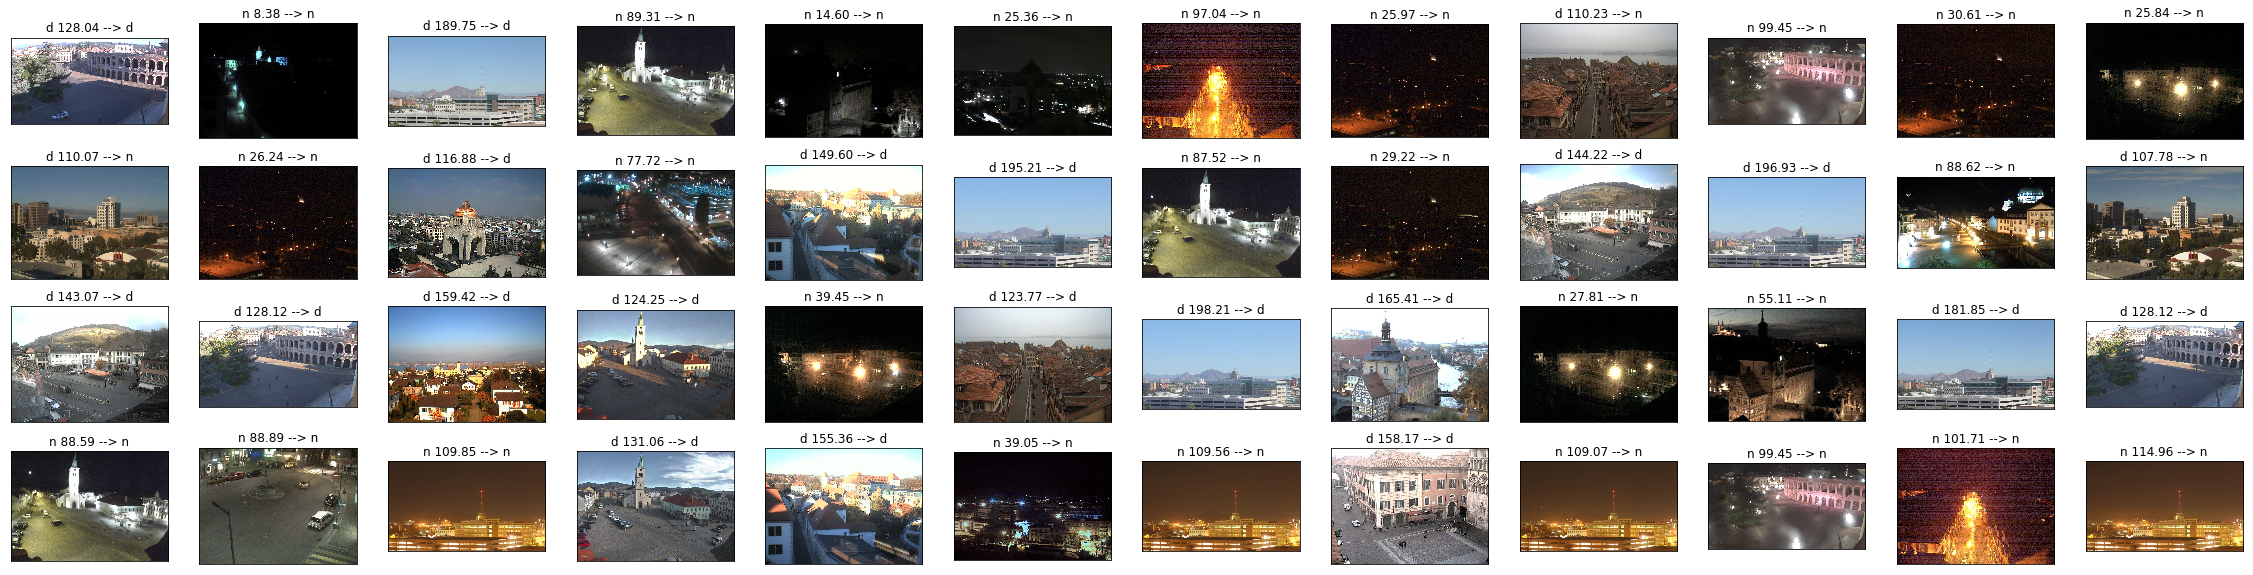

In [5]:


## TODO: Print out 1. The shape of the image and 2. The image's label `selected_label`

## TODO: Display a night image
# Note the differences between the day and night images
# Any measurable differences can be used to classify these images

import random

# Select an image and its label by list index
image_index = 0
selected_image = IMAGE_LIST[image_index][0]
selected_label = IMAGE_LIST[image_index][1]

## TODO: Print out 1. The shape of the image and 2. The image's label `selected_label`
print(selected_image.shape)
print(selected_label)

## TODO: Display a night image
# Note the differences between the day and night images
# Any measurable differences can be used to classify these images

def get_image_brightness(image):
    """
    Returns the average brigthness of given image
    """
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # HSV channels
    h = hsv[:,:,0]
    s = hsv[:,:,1]
    v = hsv[:,:,2]

    return np.average(v)

night_threshold = 115.0

fig = plt.figure(figsize=(40,10))
for i in range(48):
    index = random.randint(0, len(IMAGE_LIST) - 1)
    ax = fig.add_subplot(4, 12, i + 1, xticks=[], yticks=[])
    cur_org = IMAGE_LIST[index][0]
    label = "d" if IMAGE_LIST[index][1] == "day" else "n"
    brightness = get_image_brightness(cur_org)
    predict = "n" if brightness<night_threshold else "d"
    ax.set_title("{} {:0.2f} --> {}".format(label, brightness, predict))
    ci = cur_org.squeeze()
    ax.imshow(ci)
    
plt.show()